In [1]:
import sys
#sys.path.append("/home/rberner/cernbox/PhD/pi0_reconstruction/reco_software/lartpc_mlreco3d")   # locally
#sys.path.append("/home/rberner/cernbox/PhD/pi0_reconstruction/reco_software/pi0_reco")          # locally
sys.path.append("/u/nu/rberner/pi0_reconstruction/lartpc_mlreco3d")                            # SLAC
sys.path.append("/u/nu/rberner/pi0_reconstruction/pi0_reco")                                   # SLAC

import yaml
# Configuration for the data loader
#io_cfg =  """
#iotool:
#  batch_size: 1 
#  #minibatch_size: 5 
#  shuffle: False
#  num_workers: 4
#  collate_fn: CollateSparse
#  #sampler:
#  #  name: RandomSequenceSampler 
#  #  batch_size: 32
#  dataset:
#    name: LArCVDataset 
#    data_keys:
#    #- /gpfs/slac/staas/fs1/g/neutrino/kvtsang/pdune/mpv/val/*.root
#    #- /gpfs/slac/staas/fs1/g/neutrino/kvtsang/data/2019-09-27/*.root
#    #- /gpfs/slac/staas/fs1/g/neutrino/kvtsang/data/2019-09-27/larcv_mc_00002.root
#    #- /home/rberner/cernbox/PhD/pi0_reconstruction/reco_software/data/larcv_michel_pi0_v04.root
#    - /home/rberner/cernbox/PhD/pi0_reconstruction/reco_software/data/larcv_mc_00002.root
#    limit_num_files: 5
#    schema:
#      input_data: 
#        - parse_sparse3d_scn
#        - sparse3d_reco
#        - sparse3d_reco_inv_chi2
#        - sparse3d_reco_hit_charge0
#        - sparse3d_reco_hit_charge1
#        - sparse3d_reco_hit_charge2
#        - sparse3d_reco_hit_rms0
#        - sparse3d_reco_hit_rms1
#        - sparse3d_reco_hit_rms2
#        - sparse3d_reco_hit_time0
#        - sparse3d_reco_hit_time1
#        - sparse3d_reco_hit_time2                                                                        
#        - sparse3d_reco_occupancy
#      energy:
#        - parse_sparse3d_scn
#        - sparse3d_mcst
#      charge:
#        - parse_sparse3d_scn
#        - sparse3d_reco
#      segment_label_true:
#        - parse_sparse3d_scn
#        - sparse3d_fivetypes_true
#      segment_label_reco:
#        - parse_sparse3d_scn
#        - sparse3d_fivetypes_reco
#      particles:
#        - parse_particle_asis
#        - particle_mcst
#        - cluster3d_mcst
#      particles_label:
#        - parse_particle_points
#        - sparse3d_reco                                                                                  
#        - particle_mcst
#      group_label_true:
#        - parse_cluster3d_clean
#        - cluster3d_mcst
#        - sparse3d_mcst
#      group_label_reco:
#        - parse_cluster3d
#        - cluster3d_mcst_reco
#        - sparse3d_mcst
#      dbscan_label_true:
#        - parse_dbscan
#        - sparse3d_fivetypes_true
#      dbscan_label_reco:
#        - parse_dbscan
#        - sparse3d_fivetypes_reco
#"""

#io_cfg = """
#iotool:
#  batch_size: 1
#  shuffle: False
#  num_workers: 1
#  collate_fn: CollateSparse
#  dataset:
#    name: LArCVDataset
#    data_keys:
#     #- /gpfs/slac/staas/fs1/g/neutrino/kterao/data/mpvmpr_2020_01_v04/train.root
#     - /home/rberner/cernbox/PhD/pi0_reconstruction/reco_software/data/train.root       # locally
#     #- /u/nu/rberner/pi0_reconstruction/data/train.root                                # SLAC
#    limit_num_files: 25
#    schema:
#      input_data:
#        - parse_sparse3d_scn
#        - sparse3d_pcluster
#      segment_label:
#        - parse_sparse3d_scn
#        - sparse3d_pcluster_semantics
#      cluster_label:
#        - parse_cluster3d_full
#        - cluster3d_pcluster
#        - particle_corrected
#      particles:
#        - parse_particle_asis
#        - particle_corrected
#        - cluster3d_pcluster
#      ppn_label:
#        - parse_particle_points
#        - sparse3d_pcluster
#        - particle_corrected
#"""

io_cfg = """
iotool:
  batch_size: 1
  shuffle: False
  num_workers: 1
  collate_fn: CollateSparse
  sampler:
    name: RandomSequenceSampler
  dataset:
    name: LArCVDataset
    data_keys:
     #- /gpfs/slac/staas/fs1/g/neutrino/kterao/data/mpvmpr_2020_01_v04/train.root
     #- /home/rberner/cernbox/PhD/pi0_reconstruction/reco_software/data/train.root       # locally
     - /u/nu/rberner/pi0_reconstruction/data/train.root                                # SLAC
    limit_num_files: 1
    schema:
      input_data:
        - parse_sparse3d_scn
        - sparse3d_pcluster
      segment_label:
        - parse_sparse3d_scn
        - sparse3d_pcluster_semantics
      semantics:
        - parse_sparse3d_scn
        - sparse3d_pcluster_semantics
      dbscan_label:
        - parse_cluster3d_clean_full
        - cluster3d_pcluster
        - particle_corrected
        - sparse3d_pcluster_semantics
      particles_label:
        - parse_particle_points
        - sparse3d_pcluster
        - particle_corrected
      cluster_label:
        - parse_cluster3d_full
        - cluster3d_pcluster
        - particle_corrected
      particles:
        - parse_particle_asis
        - particle_corrected
        - cluster3d_pcluster
      ppn_label:
        - parse_particle_points
        - sparse3d_pcluster
        - particle_corrected
"""

In [2]:
# Configuration of the reconstruction chain
#chain_cfg = '''
#name: pi0_chain_test
#net_cfg: /home/rberner/cernbox/PhD/pi0_reconstruction/reco_software/config_files/uresnet_ppn.cfg
#input:            energy     # charge
#segment:          uresnet    # mask, uresnet
#response:         average    # constant, average(, full, enet)
#response_cst:     0.0082     # energy response constant (0.0082 for mask, 0.0052 for uresnet)
#response_average: 0.877      # energy response average (1.3693 for mask, 0.877 for uresnet)
#shower_start:     truth      # truth, ppn
#shower_dir:       truth      # truth, pca, cent
#shower_energy:    truth      # truth, group, cone, gnn
#shower_match:     truth      # truth, proximity
#refit_dir:        true       # true, false
#refit_cone:       true       # true, false
#'''
chain_cfg = '''
name: pi0_chain_fiducialized
#net_cfg: /home/rberner/cernbox/PhD/pi0_reconstruction/reco_software/config_files/uresnet_ppn.cfg    # locally
#net_cfg: /home/rberner/cernbox/PhD/pi0_reconstruction/reco_software/config_files/train_cluster_chain_gnn_dbscan.cfg
#net_cfg: /u/nu/rberner/pi0_reconstruction/config_files/uresnet_ppn_gpu0.cfg                        # SLAC
net_cfg: /u/nu/rberner/pi0_reconstruction/config_files/fullChain_gnn_dbscan_gpu0.cfg               # SLAC
segment:               uresnet # label, uresnet
deghost:                      # label, uresnet
charge2energy:                # null, constant, average(, full, enet)
charge2energy_cst:     0.0082 # energy response constant (0.0082 for mask, 0.0052 for uresnet)
charge2energy_average: 0.877  # energy response average (1.3693 for mask, 0.877 for uresnet)
shower_start:          label  # label, ppn
shower_fragment:       dbscan # label, dbscan
shower_direction:      pca    # label, pca, cent
shower_cluster:        cone   # label, cone
shower_cluster_params:
  IP: 40
  Distance: 300
shower_energy:         pixel_sum  # label, pixel_sum
shower_match:          label  # label, proximity
refit_dir:             true   # true, false
refit_cone:            true   # true, false
fiducialize:           0      # Number of pixels to be removed from edge of LAr volume (pixel pitch: 3mm)
'''
chain_cfg = yaml.load(chain_cfg,Loader=yaml.Loader)

In [3]:
from IPython.display import HTML, display

# Decorative progress bar
def progress(count, total, unit, message=''):
    return HTML("""
        <progress 
            value='{count}'
            max='{total}',
            style='width: 30%'
        >
            {count}
        </progress> {count}/{total} {unit} ({frac}%) ... {message}
    """.format(count=count, total=total, unit=unit, frac=int(float(count)/float(total)*100.),message=message))

In [4]:
# Initialize the chain
from pi0.chain import Pi0Chain
chain = Pi0Chain(io_cfg, chain_cfg)
from larcv import larcv
import numpy as np
from numpy import linalg

# Loop over the full dataset
masses    = []
i_draw    = 0
n_draw    = 0
data_size = 10000 # len(chain.hs.data_io)
out       = display(progress(0,data_size,'images'),display_id=True)

for ev in range(data_size):

    #print(' ev: ', ev)
    #print(' index: ', chain.event['index'][0])

    # pass if RuntimeError (likely, it is in fragment_merger.py: trace_tree function)
    try:
        chain.run_loop()
    except RuntimeError:
        print('RuntimeError')
    except ValueError:
        print('ValueError')
    except IndexError:
        print('IndexError')

    # Draw the last event if requested
    # Note: matches: if there are two reconstructed showers pointing to the same point AND this point close to a track
    #if 'matches' in chain.output and len(chain.output['matches']) and i_draw < n_draw:
    #    chain.draw()
    #    i_draw += 1

    #draw_events = [66]
    #if chain.event['index'][0] in draw_events:
    #    chain.draw()

    #chain.draw()

    out.update(progress(ev,data_size,'images'))

out.update(progress(data_size,data_size,'images'))

# Simplest way to run the full chain
#chain = Pi0Chain(io_cfg, chain_cfg)
#chain.run()

# Rename .csv file with masses in order to keep track of parameters
name_old = chain_cfg['name']+'_log.csv'
name_new = chain_cfg['name']+'_' + str(chain_cfg['fiducialize']) + 'px_' + str(data_size) + 'ev_log.csv'
! mv $name_old $name_new

Welcome to JupyROOT 6.16/00
Initialized Pi0 mass chain, log path: pi0_chain_fiducialized_log.csv

Config processed at: Linux nu-gpu02.slac.stanford.edu 3.10.0-1062.12.1.el7.x86_64 #1 SMP Tue Feb 4 23:02:59 UTC 2020 x86_64 x86_64 x86_64 GNU/Linux

$CUDA_VISIBLE_DEVICES="0"

{   'iotool': {   'batch_size': 1,
                  'collate_fn': 'CollateSparse',
                  'dataset': {   'data_keys': [   '/u/nu/rberner/pi0_reconstruction/data/train.root'],
                                 'limit_num_files': 1,
                                 'name': 'LArCVDataset',
                                 'schema': {   'cluster_label': [   'parse_cluster3d_full',
                                                                    'cluster3d_pcluster',
                                                                    'particle_corrected'],
                                               'dbscan_label': [   'parse_cluster3d_clean_full',
                                                         

Done.


/u/nu/rberner/pi0_reconstruction/pi0_reco/pi0/cluster/cone_clusterer.py:156: RuntimeWarning: invalid value encountered in arccos
  angle = np.median(np.arccos(cos))
/u/nu/rberner/pi0_reconstruction/pi0_reco/pi0/cluster/cone_clusterer.py:156: RuntimeWarning: invalid value encountered in arccos
  angle = np.median(np.arccos(cos))
/u/nu/rberner/pi0_reconstruction/pi0_reco/pi0/cluster/cone_clusterer.py:156: RuntimeWarning: invalid value encountered in arccos
  angle = np.median(np.arccos(cos))
/u/nu/rberner/pi0_reconstruction/pi0_reco/pi0/cluster/cone_clusterer.py:156: RuntimeWarning: invalid value encountered in arccos
  angle = np.median(np.arccos(cos))
/u/nu/rberner/pi0_reconstruction/pi0_reco/pi0/cluster/cone_clusterer.py:156: RuntimeWarning: invalid value encountered in arccos
  angle = np.median(np.arccos(cos))
/u/nu/rberner/pi0_reconstruction/pi0_reco/pi0/cluster/cone_clusterer.py:156: RuntimeWarning: invalid value encountered in arccos
  angle = np.median(np.arccos(cos))
/u/nu/rber

      Particle  (PdgCode,TrackID) = (-11,418) ... with Parent (-13,1)
      Vertex   (x, y, z, t) = (-316.831,-107.509,-18.7481,315.312)
      Momentum (px, py, pz) = (-17.2768,-35.4669,-31.187)
      Inittial Energy  = 50.2919
      Deposit  Energy  = 45.4565
      Creation Process = Decay
      BBox3D:     (0,0,0) => (0,0,0)

X range: -393.504 => -163.104 ... 768 bins
Y range: -128.132 => 102.268 ... 768 bins
Z range: -249.149 => -18.7491 ... 768 bins

      Particle  (PdgCode,TrackID) = (-11,418) ... with Parent (-13,1)
      Vertex   (x, y, z, t) = (-316.831,-107.509,-18.7481,315.312)
      Momentum (px, py, pz) = (-17.2768,-35.4669,-31.187)
      Inittial Energy  = 50.2919
      Deposit  Energy  = 45.4565
      Creation Process = Decay
      BBox3D:     (0,0,0) => (0,0,0)

X range: -393.504 => -163.104 ... 768 bins
Y range: -128.132 => 102.268 ... 768 bins
Z range: -249.149 => -18.7491 ... 768 bins



/u/nu/rberner/pi0_reconstruction/pi0_reco/pi0/cluster/cone_clusterer.py:156: RuntimeWarning: invalid value encountered in arccos
  angle = np.median(np.arccos(cos))


RuntimeError


/u/nu/rberner/pi0_reconstruction/pi0_reco/pi0/cluster/cone_clusterer.py:156: RuntimeWarning: invalid value encountered in arccos
  angle = np.median(np.arccos(cos))
/u/nu/rberner/pi0_reconstruction/pi0_reco/pi0/cluster/cone_clusterer.py:156: RuntimeWarning: invalid value encountered in arccos
  angle = np.median(np.arccos(cos))
/u/nu/rberner/pi0_reconstruction/pi0_reco/pi0/cluster/cone_clusterer.py:156: RuntimeWarning: invalid value encountered in arccos
  angle = np.median(np.arccos(cos))
/u/nu/rberner/pi0_reconstruction/pi0_reco/pi0/cluster/cone_clusterer.py:156: RuntimeWarning: invalid value encountered in arccos
  angle = np.median(np.arccos(cos))
/u/nu/rberner/pi0_reconstruction/pi0_reco/pi0/cluster/cone_clusterer.py:156: RuntimeWarning: invalid value encountered in arccos
  angle = np.median(np.arccos(cos))
/u/nu/rberner/pi0_reconstruction/pi0_reco/pi0/cluster/cone_clusterer.py:156: RuntimeWarning: invalid value encountered in arccos
  angle = np.median(np.arccos(cos))
/u/nu/rber

RuntimeError


/u/nu/rberner/pi0_reconstruction/pi0_reco/pi0/cluster/cone_clusterer.py:156: RuntimeWarning: invalid value encountered in arccos
  angle = np.median(np.arccos(cos))
/u/nu/rberner/pi0_reconstruction/pi0_reco/pi0/cluster/cone_clusterer.py:156: RuntimeWarning: invalid value encountered in arccos
  angle = np.median(np.arccos(cos))
/u/nu/rberner/pi0_reconstruction/pi0_reco/pi0/cluster/cone_clusterer.py:156: RuntimeWarning: invalid value encountered in arccos
  angle = np.median(np.arccos(cos))
/u/nu/rberner/pi0_reconstruction/pi0_reco/pi0/cluster/cone_clusterer.py:156: RuntimeWarning: invalid value encountered in arccos
  angle = np.median(np.arccos(cos))
/u/nu/rberner/pi0_reconstruction/pi0_reco/pi0/cluster/cone_clusterer.py:156: RuntimeWarning: invalid value encountered in arccos
  angle = np.median(np.arccos(cos))
/u/nu/rberner/pi0_reconstruction/pi0_reco/pi0/cluster/cone_clusterer.py:156: RuntimeWarning: invalid value encountered in arccos
  angle = np.median(np.arccos(cos))
/u/nu/rber

 Fitted parameters: 
 a [-]: 	  1470.1408700283514  
 μ [MeV/c2]: 	  89.95452809758883  
 σ [MeV/c2]: 	  34.966427234794715


<Figure size 1080x720 with 0 Axes>

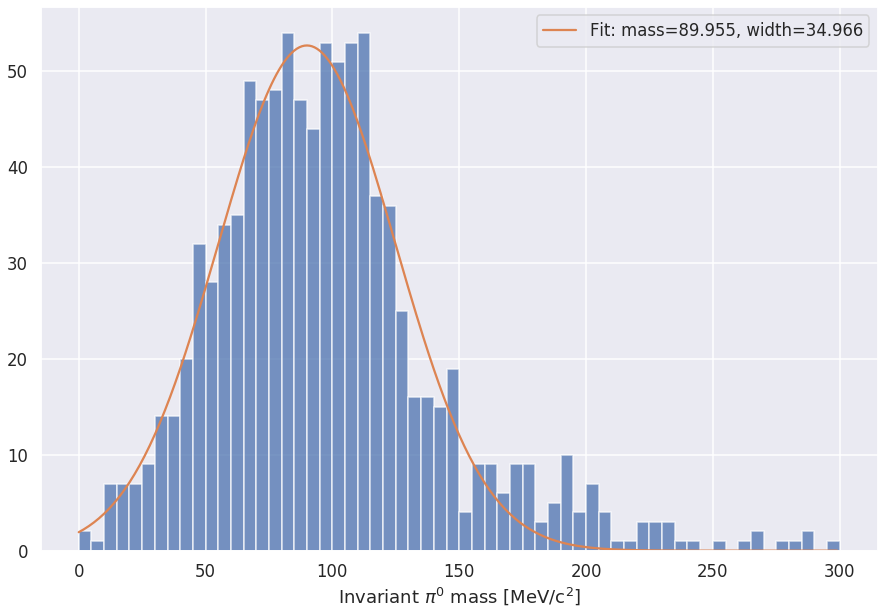

In [5]:
import numpy as np
import pandas as pd
import seaborn
from matplotlib import pyplot as plt

seaborn.set(rc={'figure.figsize':(15, 10),})
seaborn.set_context('talk') # or paper

def gaus(x, a, mu, sigma):
    return  a*np.exp(-(x-mu)**2/2./sigma**2)/np.sqrt(2./np.pi)/sigma

def fit_func(bins, n, func):
    from scipy.optimize import curve_fit
    center = (bins[:-1] + bins[1:]) / 2
    popt, pcov = curve_fit(func, center, n, p0=(100, 100, 10))
    print(" Fitted parameters: \n a [-]: \t ", popt[0],
          " \n \u03BC [MeV/c2]: \t ", popt[1],
          " \n \u03C3 [MeV/c2]: \t ", popt[2])

    x = np.arange(0, 300, 1)
    y = func(x, popt[0], popt[1], popt[2])
    plt.plot(x, y, label='Fit: mass=%5.3f, width=%5.3f' % (popt[1], popt[2]))
    plt.legend()

# Load the output file, draw mass peak
df = pd.read_csv(chain_cfg['name']+'_' + str(chain_cfg['fiducialize']) + 'px_' + str(data_size) + 'ev_log.csv')
#df = pd.read_csv('pi0_chain.csv')
plt.figure()
fig, ax = plt.subplots()
n, bins, patches = ax.hist(df.pion_mass, bins=60, range=[0,300], alpha=0.75)
ax.set_xlabel('Invariant $\pi^0$ mass [MeV/c$^2$]')

# Fit the peak with a Gaussian
fit_func(bins, n, gaus)
fig_name = '05_fiducialized_' + str(chain_cfg['fiducialize']) + 'px_' + str(data_size) + 'ev.png'
plt.savefig(fig_name,dpi=400)
plt.show()

# Print pion mass dataframe
#print(df.to_string())

# Just some tests

In [6]:
# The config files contain, e.g., 'particles', 'cluster_label', etc.

# Get particle:
particle = chain.event['particles'][0][0]
#help(particle)

cluster = chain.event['cluster_label'][0]
#print("cluster: ", cluster)
# to see what the entries of this array are, look up the information from the .cfg:
      #cluster_label:
      #  - parse_cluster3d_full
      #  - cluster3d_pcluster
      #  - particle_corrected
# -> Need to have a look to 'parse_cluster3d_full, which lives in mlreco/iotools/parse_cluster3d_full'

In [7]:
chain.output.keys()

dict_keys(['forward', 'charge', 'segment', 'shower_mask', 'energy', 'showers', 'shower_fragments', 'leftover_energy', 'leftover_fragments', 'matches', 'vertices'])

In [8]:
chain.output['showers'][0]

In [9]:
shower = chain.output['showers'][0]
help(shower)

Help on Shower in module pi0.chain object:

class Shower(builtins.object)
 |  # Class that contains all the shower information
 |  
 |  Methods defined here:
 |  
 |  __init__(self, start=[], direction=[], voxels=[], energy=-1.0, pid=-1)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [10]:
particle = 0
help(chain.event['particles'][0][particle].first_step())

Help on Vertex in module larcv object:

class Vertex(ROOT.ObjectProxy)
 |  PyROOT object proxy (internal)
 |  
 |  Method resolution order:
 |      Vertex
 |      ROOT.ObjectProxy
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __assign__ = <ROOT.MethodProxy object>
 |  __cpp_eq__ = <ROOT.MethodProxy object>
 |  __cpp_ne__ = <ROOT.MethodProxy object>
 |  __eq__(...) from builtins.NoneType
 |      PyROOT custom instance method (internal)
 |  
 |  __init__ = <ROOT.MethodProxy object>
 |  __lt__ = <ROOT.MethodProxy object>
 |  __ne__(...) from builtins.NoneType
 |      PyROOT custom instance method (internal)
 |  
 |  __str__(...) from builtins.NoneType
 |      PyROOT custom instance method (internal)
 |  
 |  as_point = <ROOT.MethodProxy object>
 |  as_point2d = <ROOT.MethodProxy object>
 |  as_point3d = <ROOT.MethodProxy object>
 |  dump = <ROOT.MethodProxy object>
 |  reset = <ROOT.MethodProxy object>
 |  t = <ROOT.MethodProxy object>
 |  x = <ROOT.MethodProxy object>
 

In [11]:
! cat /home/rberner/cernbox/PhD/pi0_reconstruction/reco_software/config_files/uresnet_ppn.cfg

cat: /home/rberner/cernbox/PhD/pi0_reconstruction/reco_software/config_files/uresnet_ppn.cfg: No such file or directory


In [12]:
! cat /home/rberner/cernbox/PhD/pi0_reconstruction/reco_software/pi0_reco/pi0/chain.py

cat: /home/rberner/cernbox/PhD/pi0_reconstruction/reco_software/pi0_reco/pi0/chain.py: No such file or directory
